In [2]:
import pandas as pd
import numpy as np

In [4]:
df_l1= pd.read_csv('/kaggle/input/gender-abuse-dataset/train_en_l1.csv')
df_l1

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,text,key,en_a1,en_a2,en_a3,en_a4,en_a5,en_a6
0,"This is our history . For Shia and Sunni ,...",question_1,NaN,NaN,NaN,NaN,NaN,0.0
1,"If this is ""grilling"" then wht wud u call t...",question_1,NaN,NaN,NaN,1.0,NaN,NaN
2,look at <handle replaced>madam. Locals attac...,question_1,NaN,NaN,NaN,NaN,0.0,NaN
3,our beloved yogi ji has given money home and...,question_1,NaN,NaN,NaN,NaN,1.0,NaN
4,"""I gonna kill that bitch"" Bitvj imma kill you...",question_1,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
6526,“mama let’s research” bitch suck my dick 😭,question_1,NaN,NaN,NaN,NaN,0.0,NaN
6527,😂😂😂😂 I WAS BY MYSELF AND IT WAS HER AND HER BI...,question_1,NaN,NaN,NaN,NaN,0.0,NaN
6528,😂😂😂😂😂😂😂😂😂 i just seen a comment and bitch IM C...,question_1,NaN,NaN,NaN,NaN,0.0,NaN
6529,"😎""Boys Only Luxury!!!!!!!!!!!!!!!!!!!!!!!!!!!""...",question_1,0.0,1.0,1.0,0.0,NaN,NaN


In [5]:
annotation_cols = ['en_a1', 'en_a2', 'en_a3', 'en_a4', 'en_a5', 'en_a6']

def get_majority_label(row):
    valid_votes = []
    for val in row:
        try:
            fval = float(val)
            if fval in [0.0, 1.0]:
                valid_votes.append(fval)
        except (ValueError, TypeError):
            continue

    if not valid_votes:
        return None

    ones = valid_votes.count(1.0)
    zeros = valid_votes.count(0.0)

    return 1 if ones >= zeros else 0  

In [6]:
df_l1['label_1'] = df_l1[annotation_cols].apply(get_majority_label,axis=1)
df_l1

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,text,key,en_a1,en_a2,en_a3,en_a4,en_a5,en_a6,label_1
0,"This is our history . For Shia and Sunni ,...",question_1,NaN,NaN,NaN,NaN,NaN,0.0,0
1,"If this is ""grilling"" then wht wud u call t...",question_1,NaN,NaN,NaN,1.0,NaN,NaN,1
2,look at <handle replaced>madam. Locals attac...,question_1,NaN,NaN,NaN,NaN,0.0,NaN,0
3,our beloved yogi ji has given money home and...,question_1,NaN,NaN,NaN,NaN,1.0,NaN,1
4,"""I gonna kill that bitch"" Bitvj imma kill you...",question_1,NaN,NaN,NaN,NaN,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...
6526,“mama let’s research” bitch suck my dick 😭,question_1,NaN,NaN,NaN,NaN,0.0,NaN,0
6527,😂😂😂😂 I WAS BY MYSELF AND IT WAS HER AND HER BI...,question_1,NaN,NaN,NaN,NaN,0.0,NaN,0
6528,😂😂😂😂😂😂😂😂😂 i just seen a comment and bitch IM C...,question_1,NaN,NaN,NaN,NaN,0.0,NaN,0
6529,"😎""Boys Only Luxury!!!!!!!!!!!!!!!!!!!!!!!!!!!""...",question_1,0.0,1.0,1.0,0.0,NaN,NaN,1


In [7]:
df = pd.DataFrame({
    'text': df_l1['text'],
    'label_1': df_l1['label_1'],

})

# Convert to int
df['label_1'] = df['label_1'].astype(int)


# Preview
print(df.head())
print(df.shape)

                                                text  label_1
0      This is our history . For Shia and Sunni ,...        0
1     If this is "grilling" then wht wud u call t...        1
2    look at <handle replaced>madam. Locals attac...        0
3    our beloved yogi ji has given money home and...        1
4  "I gonna kill that bitch"  Bitvj imma kill you...        1
(6531, 2)


In [8]:
df

,text,label_1
0,"This is our history . For Shia and Sunni ,...",0
1,"If this is ""grilling"" then wht wud u call t...",1
2,look at <handle replaced>madam. Locals attac...,0
3,our beloved yogi ji has given money home and...,1
4,"""I gonna kill that bitch"" Bitvj imma kill you...",1
...,...,...
6526,“mama let’s research” bitch suck my dick 😭,0
6527,😂😂😂😂 I WAS BY MYSELF AND IT WAS HER AND HER BI...,0
6528,😂😂😂😂😂😂😂😂😂 i just seen a comment and bitch IM C...,0
6529,"😎""Boys Only Luxury!!!!!!!!!!!!!!!!!!!!!!!!!!!""...",1


In [9]:
import re
def normalize_text(text):
    text = str(text).lower()
    text = re.sub(r'<handle replaced>', '[USER]', text)       
    text = re.sub(r'https?://\S+|www\.\S+', '', text)         
    text = re.sub(r'<.*?>', '', text)                          
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()                   
    return text

In [10]:
df['text'] = df['text'].apply(normalize_text)
df

,text,label_1
0,this is our history for shia and sunni dont li...,0
1,if this is grilling then wht wud u call th stu...,1
2,look at USERmadam locals attacked no religion ...,0
3,our beloved yogi ji has given money home and f...,1
4,i gonna kill that bitch bitvj imma kill you we...,1
...,...,...
6526,mama lets research bitch suck my dick,0
6527,i was by myself and it was her and her bitch a...,0
6528,i just seen a comment and bitch im cryinnnnnn ...,0
6529,boys only luxury pussyposse pussyfucking pussy...,1


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from collections import Counter
import matplotlib.pyplot as plt

# Load data
X_texts = list(df['text'])
y = df['label_1'].values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


2025-04-15 16:17:01.728478: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744733821.974284      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744733822.039085      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [13]:

max_features = 4479
max_len = 100
embed_size = 300

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_texts)
X_sequences = tokenizer.texts_to_sequences(X_texts)
X_padded = pad_sequences(X_sequences, maxlen=max_len, padding='post')
X_padded = np.array(X_padded)

y_cat = np.eye(2)[y]
y_cat

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [14]:
# Step 1: Download GloVe
!wget http://nlp.stanford.edu/data/glove.6B.zip

# Step 2: Unzip the downloaded file
!unzip glove.6B.zip -d glove


--2025-04-15 16:17:18--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-15 16:17:19--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-15 16:17:19--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov


Fold 1
Epoch 1 - Train Acc: 0.7942, Val Acc: 0.7857
Epoch 2 - Train Acc: 0.7942, Val Acc: 0.7857
Epoch 3 - Train Acc: 0.7936, Val Acc: 0.7857
Epoch 4 - Train Acc: 0.7877, Val Acc: 0.7838
Epoch 5 - Train Acc: 0.7945, Val Acc: 0.7783
Epoch 6 - Train Acc: 0.7982, Val Acc: 0.7795
Epoch 7 - Train Acc: 0.8025, Val Acc: 0.7814
Epoch 8 - Train Acc: 0.8113, Val Acc: 0.7817
Epoch 9 - Train Acc: 0.8129, Val Acc: 0.7906
Epoch 10 - Train Acc: 0.8110, Val Acc: 0.7829
Epoch 11 - Train Acc: 0.8178, Val Acc: 0.7887
Epoch 12 - Train Acc: 0.8175, Val Acc: 0.7881
Epoch 13 - Train Acc: 0.8227, Val Acc: 0.7906
Epoch 14 - Train Acc: 0.8178, Val Acc: 0.7936
Epoch 15 - Train Acc: 0.8221, Val Acc: 0.7900
Fold 1 - Classification Report:
              precision    recall  f1-score   support

        Hate       0.82      0.93      0.87      2566
    Not Hate       0.52      0.27      0.36       700

    accuracy                           0.79      3266
   macro avg       0.67      0.60      0.61      3266
weighte

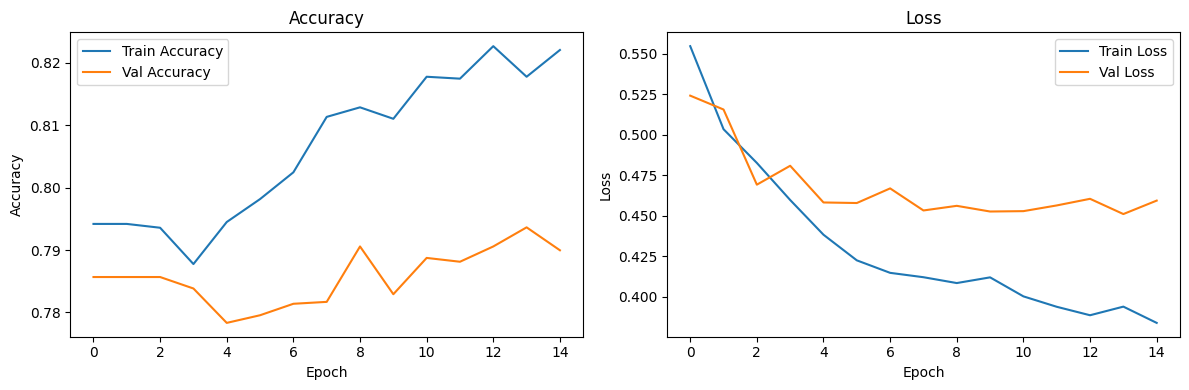


Fold 2
Epoch 1 - Train Acc: 0.7857, Val Acc: 0.7942
Epoch 2 - Train Acc: 0.7857, Val Acc: 0.7942
Epoch 3 - Train Acc: 0.7848, Val Acc: 0.7945
Epoch 4 - Train Acc: 0.7848, Val Acc: 0.7920
Epoch 5 - Train Acc: 0.7863, Val Acc: 0.7599
Epoch 6 - Train Acc: 0.7832, Val Acc: 0.7942
Epoch 7 - Train Acc: 0.7863, Val Acc: 0.7942
Epoch 8 - Train Acc: 0.7930, Val Acc: 0.7730
Epoch 9 - Train Acc: 0.7903, Val Acc: 0.7703
Epoch 10 - Train Acc: 0.7887, Val Acc: 0.7942
Epoch 11 - Train Acc: 0.7918, Val Acc: 0.8021
Epoch 12 - Train Acc: 0.8013, Val Acc: 0.7963
Epoch 13 - Train Acc: 0.8019, Val Acc: 0.7905
Epoch 14 - Train Acc: 0.8096, Val Acc: 0.8003
Epoch 15 - Train Acc: 0.8083, Val Acc: 0.7951
Fold 2 - Classification Report:
              precision    recall  f1-score   support

        Hate       0.83      0.93      0.88      2593
    Not Hate       0.50      0.28      0.36       672

    accuracy                           0.80      3265
   macro avg       0.67      0.61      0.62      3265
weighte

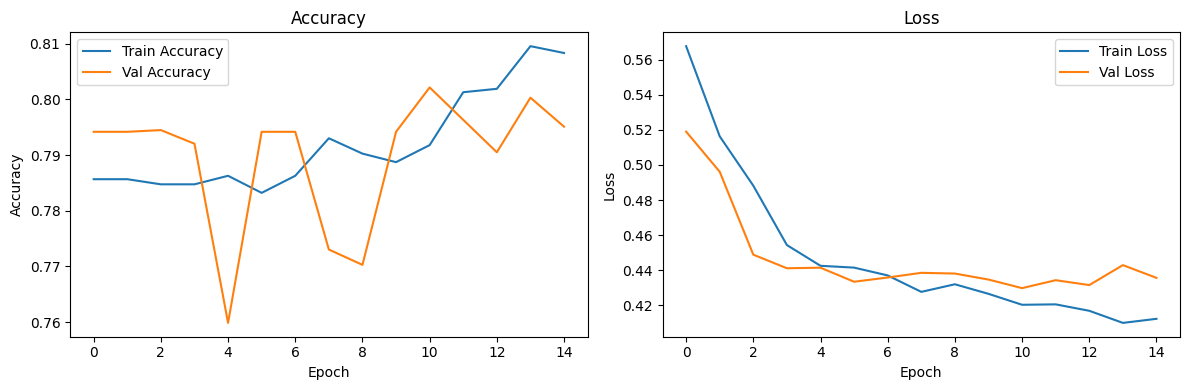


Average Results Across 2 Folds:
Precision: 0.76
Recall: 0.79
F1 Score: 0.77


In [15]:

embeddings_index = {}
with open('glove/glove.6B.300d.txt', encoding="utf8") as f:    
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

embedding_matrix = np.zeros((max_features, embed_size))
for word, i in tokenizer.word_index.items():
    if i >= max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


class TextDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.LongTensor(X)
        self.y = torch.FloatTensor(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

class LSTMClassifier(nn.Module):
    def __init__(self, embedding_matrix):
        super(LSTMClassifier, self).__init__()
        vocab_size, embed_size = embedding_matrix.shape
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = False
        self.dropout1 = nn.Dropout(0.2)
        self.conv1 = nn.Conv1d(embed_size, 64, kernel_size=2)
        self.lstm = nn.LSTM(64, 128, batch_first=True, bidirectional=True)
        self.avgpool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.2)
        self.out = nn.Linear(128, 2)

    def forward(self, x):
        x = self.embedding(x)
        x = self.dropout1(x)
        x = x.permute(0, 2, 1)
        x = self.conv1(x)
        x = x.permute(0, 2, 1)
        x, _ = self.lstm(x)
        x = x.permute(0, 2, 1)
        x = self.avgpool(x).squeeze(2)
        x = torch.relu(self.fc(x))
        x = self.dropout2(x)
        return self.out(x)

kf = KFold(n_splits=2, shuffle=True, random_state=42)
precision_list, recall_list, f1_list = [], [], []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for fold, (train_idx, val_idx) in enumerate(kf.split(X_padded)):
    print(f"\nFold {fold+1}")
    train_dataset = TextDataset(X_padded[train_idx], y_cat[train_idx])
    val_dataset = TextDataset(X_padded[val_idx], y_cat[val_idx])
    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=128)

    model = LSTMClassifier(embedding_matrix).to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    criterion = nn.CrossEntropyLoss()

    train_acc_hist, val_acc_hist, train_loss_hist, val_loss_hist = [], [], [], []
    best_val_f1 = 0.0
    best_model_path = f"model{fold+1}.pt"

     
    for epoch in range(15):
        model.train()
        total_loss, correct = 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, torch.argmax(labels, dim=1))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            preds = torch.argmax(outputs, axis=1)
            correct += (preds == torch.argmax(labels, dim=1)).sum().item()

        train_acc = correct / len(train_loader.dataset)
        train_acc_hist.append(train_acc)
        train_loss_hist.append(total_loss / len(train_loader))

        model.eval()
        val_loss, correct = 0, 0
        y_preds, y_true = [], []
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, torch.argmax(labels, dim=1))
                val_loss += loss.item()
                preds = torch.argmax(outputs, axis=1)
                correct += (preds == torch.argmax(labels, dim=1)).sum().item()
                y_preds.extend(preds.cpu().numpy())
                y_true.extend(torch.argmax(labels, axis=1).cpu().numpy())

        val_acc = correct / len(val_loader.dataset)
        val_acc_hist.append(val_acc)
        val_loss_hist.append(val_loss / len(val_loader))

        print(f"Epoch {epoch+1} - Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")
        

    report = classification_report(y_true, y_preds, target_names=['Hate', 'Not Hate'], output_dict=True)
    precision_list.append(report['weighted avg']['precision'])
    recall_list.append(report['weighted avg']['recall'])
    f1_list.append(report['weighted avg']['f1-score'])
    val_f1 = report['weighted avg']['f1-score']

    
    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        torch.save(model.state_dict(), best_model_path)
    print(f'Fold {fold + 1} - Classification Report:\n{classification_report(y_true, y_preds, target_names=["Hate", "Not Hate"])}\n')

    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_acc_hist, label="Train Accuracy")
    plt.plot(val_acc_hist, label="Val Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_loss_hist, label="Train Loss")
    plt.plot(val_loss_hist, label="Val Loss")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

print("\nAverage Results Across 2 Folds:")
print(f"Precision: {np.mean(precision_list):.2f}")
print(f"Recall: {np.mean(recall_list):.2f}")
print(f"F1 Score: {np.mean(f1_list):.2f}")


In [18]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score


f1 = f1_score(y_true, y_preds, average='weighted')
precision = precision_score(y_true, y_preds, average='weighted')
recall = recall_score(y_true, y_preds, average='weighted')

print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(report)


F1 Score: 0.772016971043359
Precision: 0.7655414897213456
Recall: 0.7950995405819296
{'Hate': {'precision': 0.8333333333333334, 'recall': 0.9274971075973776, 'f1-score': 0.8778974265376893, 'support': 2593}, 'Not Hate': {'precision': 0.503957783641161, 'recall': 0.28422619047619047, 'f1-score': 0.3634633682207421, 'support': 672}, 'accuracy': 0.7950995405819296, 'macro avg': {'precision': 0.6686455584872472, 'recall': 0.6058616490367841, 'f1-score': 0.6206803973792157, 'support': 3265}, 'weighted avg': {'precision': 0.7655414897213456, 'recall': 0.7950995405819296, 'f1-score': 0.772016971043359, 'support': 3265}}


In [21]:
vv= pd.read_csv('/kaggle/input/gender-abuse-dataset/test_en_l1.csv')

In [22]:
vv


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,text,key,en_a1,en_a2,en_a3,en_a4,en_a5,en_a6
0,"""who's this tweet about"" bitch it's about you ...",question_1,NaN,0.0,NaN,NaN,0.0,1.0
1,#AlkaLamba should’ve used her slippers to slap...,question_1,0.0,0.0,NaN,0.0,NaN,NaN
2,#CoronaVillains #COVIDIDIOT #COVID2019 is a...,question_1,NaN,NaN,1.0,NaN,1.0,1.0
3,"(Acts 29:19994) LIKE the female ""governors"" of...",question_1,NaN,1.0,1.0,NaN,1.0,NaN
4,***Let us celebrate “secular” as a beautiful w...,question_1,NaN,0.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
1102,you should be tired of not having any kind of ...,question_1,0.0,NaN,1.0,NaN,NaN,1.0
1103,“The limits of tyrants are prescribed by the e...,question_1,0.0,NaN,0.0,NaN,0.0,NaN
1104,♋️🦀 like wtf my symbol is 69 and I’m a crab an...,question_1,NaN,NaN,0.0,NaN,0.0,1.0
1105,"🇺🇸: marry a millionaire guy, divorce get half ...",question_1,NaN,NaN,1.0,NaN,1.0,1.0


In [23]:
import string
def normalize_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    return text
## Apply the written function ##
vv['text'] = vv['text'].apply(lambda x: normalize_text(x))
processed_list = []
for j in vv['text']:
    process = j.replace('...','')
    processed_list.append(process)

vv = pd.DataFrame(processed_list)
vv.columns = ['text']
vv.head(n=5)


,text
0,who s this tweet about bitch it s about you ...
1,alkalamba should’ve used her slippers to slap...
2,coronavillains covididiot is a do...
3,acts like the female governors of stat...
4,let us celebrate “secular” as a beautiful w...


In [24]:
model = LSTMClassifier(embedding_matrix).to(device)
model.load_state_dict(torch.load('/kaggle/working/model2.pt', map_location=device))
model.eval()

sequence = tokenizer.texts_to_sequences(vv['text'])  
sequence = pad_sequences(sequence, padding='post', maxlen=max_len)
input_tensor = torch.tensor(sequence).long().to(device)

with torch.no_grad():
    outputs = model(input_tensor)
    predictions = torch.argmax(outputs, dim=1).cpu().numpy()

ids = np.arange(1, len(predictions) + 1)
result_df = pd.DataFrame({'id': ids, 'value': predictions})
result_df.to_csv('/kaggle/working/Task1_output_English.csv', index=False)

print(result_df.head())

   id  value
0   1      0
1   2      1
2   3      0
3   4      0
4   5      0


/tmp/ipykernel_31/2208695302.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/kaggle/working/model2.pt', map_location=device))


In [27]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report

true_df = pd.read_csv('/kaggle/input/gender-abuse-dataset/test_en_l1.csv', on_bad_lines='skip', engine='python')

annotation_cols = ['en_a1', 'en_a2', 'en_a3', 'en_a4', 'en_a5','en_a6']

def get_majority_label(row):
    valid_votes = []
    for val in row:
        try:
            fval = float(val)
            if fval in [0.0, 1.0]:
                valid_votes.append(fval)
        except (ValueError, TypeError):
            continue
    if not valid_votes:
        return None
    ones = valid_votes.count(1.0)
    zeros = valid_votes.count(0.0)
    return 1 if ones >= zeros else 0

true_df['label_1'] = true_df[annotation_cols].apply(get_majority_label, axis=1)

true_df = true_df.dropna(subset=['label_1']).reset_index(drop=True)
true_labels = true_df['label_1'].astype(int).values

predictions = predictions[:len(true_labels)]

f1 = f1_score(true_labels, predictions, average='weighted')
precision = precision_score(true_labels, predictions, average='weighted')
recall = recall_score(true_labels, predictions, average='weighted')
accuracy = accuracy_score(true_labels, predictions)

print("\n Evaluation on Test Set:")
print(f"F1 Score:      {f1:.4f}")
print(f"Precision:     {precision:.4f}")
print(f"Recall:        {recall:.4f}")
print(f"Accuracy:      {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(true_labels, predictions, target_names=["Hate", "Not Hate"]))


 Evaluation on Test Set:
F1 Score:      0.7737
Precision:     0.7681
Recall:        0.7967
Accuracy:      0.7967

Classification Report:
              precision    recall  f1-score   support

        Hate       0.83      0.93      0.88       877
    Not Hate       0.52      0.29      0.37       230

    accuracy                           0.80      1107
   macro avg       0.68      0.61      0.63      1107
weighted avg       0.77      0.80      0.77      1107

